<a href="https://colab.research.google.com/github/kaytlyn724/MAT422/blob/main/HW2.4_Maximum_Likelihood_Estimation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **2.4 Maximum Likelihood Estimation**

---

### **Key Concepts:**

*   2.4.1. MLE for random samples
*   2.4.2. Linear regression

In [ ]:
### important imports to run code ###

import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## **2.4.1. MLE for Random Samples**

**MLE for Random Samples:** Maximum likelihood estimation (MLE) is an effective approach of estimating the parameters of a probability distribution through maximizing a likelihood function. The point in the parameter space that maximizes the likelihood function is called the maximum likelihood estimate. The logic of maximum likelihood is both intuitive and flexible. As a result, the method has become a dominant means of statistical inference



In [ ]:
# Simulate random samples from a normal distribution
np.random.seed(42)
# 100 samples, mean=10, std=2
data = np.random.normal(loc=10, scale=2, size=100)

# The negative log-likelihood function for a normal distribution
def neg_log_likelihood(params, data):
    mu, sigma = params
    if sigma <= 0:
      # Sigma must be positive
        return np.inf
    return -np.sum(norm.logpdf(data, loc=mu, scale=sigma))

# Initial guesses for mean and std
initial_params = [np.mean(data), np.std(data)]

# Minimize the negative log-likelihood and get the mean and std from it
result = minimize(neg_log_likelihood, initial_params, args=(data,), bounds=[(None, None), (1e-5, None)])
mle_mu, mle_sigma = result.x

# Print the mean and std
print(f"MLE estimate for mean: {mle_mu}")
print(f"MLE estimate for standard deviation: {mle_sigma}")

MLE estimate for mean: 9.792306965211813
MLE estimate for standard deviation: 1.8072323532892591


## **2.4.2. Linear Regression**

**Linear Regression:** Given input data points ${(x_i, y_i)}^n_{i=1}$, we seek an aﬀine function to fit the data and each $x_i = (x_{i1}, ...., x_{ip})$. The common approach involves finding coeﬀicients $β_j, j = 1..., p$’s that minimize the criterion

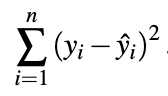

where

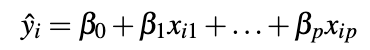

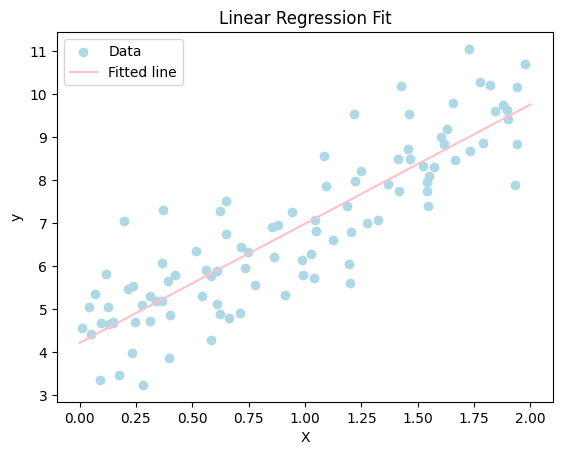

Intercept (β0): [4.21509616]
Coefficient (β1): [[2.77011339]]
Mean Squared Error: 0.8065845639670531
R-squared: 0.7692735413614223


In [ ]:
# Simulated data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
# y = 4 + 3X + noise
y = 4 + 3 * X + np.random.randn(100, 1)

# Fit the linear regression model using X and y
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Get the intercept and coefficient parameters
beta_0 = lin_reg.intercept_
beta_1 = lin_reg.coef_

# Predict with new data
X_new = np.array([[0], [2]])
y_predict = lin_reg.predict(X_new)

# Calculate the associated metrics using the prediction and the original y
y_pred = lin_reg.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

# Plotting the results
plt.scatter(X, y, color='lightblue', label='Data')
plt.plot(X_new, y_predict, color='pink', label='Fitted line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

# Print out the other information about data
print(f"Intercept (β0): {beta_0}")
print(f"Coefficient (β1): {beta_1}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")